# Image Manipulation in Numpy
##### Adinda De Coster, Kurt Farasyn en Maia Francx De Gelder

## Deel 1

### Imports

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import os

### Basis Functies

In [2]:
#functie om beeld om te zetten naar matrix - imagetomatrix (file)
def imagetomatrix (file) :
    image = Image.open(file)
    imagematrix = np.asarray(image)
    return imagematrix

In [3]:
# functie om (image)matrix horizontaal te spiegelen - fliphor (image)
def fliphor (image) :
    r = image.shape[0]
    k = image.shape[1]
    #print(r,k)
    image_fliphor = np.zeros(shape = (r,k,3), dtype=np.int32)
    for i in range(r) :
        for j in range(k) :
            image_fliphor[i,j] = image[i,(r-1-j)%r]        
    return image_fliphor

In [4]:
# functie om (image)matrix vertikaal te spiegelen - flipver (image)
def flipver (image) :
    r = image.shape[0]
    k = image.shape[1]
    #print(r,k)
    image_flipver = np.zeros(shape = (r,k,3), dtype=np.int32)
    for i in range(r) :
        for j in range(k) :
            image_flipver[i,j] = image[(k-1-i)%k,j]  
    return image_flipver

In [5]:
# functie om (image)matrix horizontaal en vertikaal te spiegelen - fliphorver (image)
def fliphorver (image) :
    r = image.shape[0]
    k = image.shape[1]
    #print(r,k)
    image_fliphorver = np.zeros(shape = (r,k,3), dtype=np.int32)
    image_fliphorver = flipver(fliphor(image))
    return image_fliphorver

In [6]:
# functie om 1 kleur van imagematrix (rgb) te bewaren - keepcolor (image,color)
def keepcolor (image,color) :
    image_color = image.copy()
    if color == 0 : #keep red postitie 0:
        image_color[:,:,[1,2]] = 0
    elif color == 1 : #keep green postitie 1:
        image_color[:,:,[0,2]] = 0
    elif color == 2 : #keep blue postitie 2:
        image_color[:,:,[0,1]] = 0
    return image_color

In [7]:
# functie om wit + 1 kleur van imagematrix (rgb) te bewaren - keepcolor_w (image,color)
def keepcolor_w (image,color) :
    image_color = image.copy()
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]) :
            if not (image_color[i,j,0] == 255 and image_color[i,j,1] == 255 and image_color[i,j,2] == 255) :
                if color == 0 : #keep red postitie 0:
                    image_color[i,j,[1,2]] = 0
                elif color == 1 : #keep green postitie 1:
                    image_color[i,j,[0,2]] = 0
                elif color == 2 : #keep blue postitie 2:
                    image_color[i,j,[0,1]] = 0
    return image_color

In [8]:
# functie om (image)matrix een factor te vergroten - larger (image,f)
def larger (image,f) :
    r = image.shape[0]
    k = image.shape[1]
    image_larger = np.zeros(shape = (r*f,k*f,3), dtype=np.int32)
    for i in range(image_larger.shape[0]) :
        for j in range(image_larger.shape[1]) :
            image_larger[i,j] = image[i//f,j//f]
    return image_larger

In [9]:
# functie om (image)matrix horizontaal te herhalen - repeat_k (image,fk)
def repeat_k (image,fk) : #k >= 2
    pict = image.copy()
    for j in range(1,fk) :
        pict = np.concatenate([pict, image], axis = 1)
    return pict 

In [10]:
# functie om (image)matrix vertikaal te herhalen - repeat_r (image,fr)
def repeat_r (image,fr) : #r >= 2
    pict = image.copy()
    for i in range(1,fr) :
        pict = np.concatenate([pict, image], axis = 0)
    return pict

### Advanced Functies

In [53]:
def grid_with_flips(image, matrix):
    
    #Convert image to array
    image_array = np.array(image)
    
    #Calculate number of rows and columns
    matrix = list(matrix)
    num_rows = len(matrix)
    num_cols = len(matrix[0]) 
    
    #Create empty matrix
    flipped_images = []
    

    for row in range(num_rows):
        for col in range(num_cols):
            #Coördinates of each flip type
            flip_type = matrix[row][col]
            
             #Assign flip types
            if flip_type == 0:
                flipped_image = image_array
            elif flip_type == 1:
                flipped_image = np.flipud(image_array)
            elif flip_type == 2:
                flipped_image = np.fliplr(image_array)
            elif flip_type == 3:
                flipped_image = np.flipud(np.fliplr(image_array))
            
            #Append all images
            flipped_images.append(flipped_image)
            
    # Create subplots to display each flipped image
    num_images = len(flipped_images)
    rows = int(np.ceil(num_images / num_cols))
    fig, axes = plt.subplots(rows, num_cols, figsize=(5*num_cols, 5*rows))
    
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(flipped_images[i])
            ax.set_axis_off()
        else:
            ax.axis('off')

In [61]:
def create_colorful_big_one(image, colors):
    
    # Convert to numpy array
    image_array = np.array(image)
    
    # Define colors
    red_image = keepcolor (image_array,0)
    green_image = keepcolor (image_array,1)
    blue_image = keepcolor (image_array,2)
    color_maps = {'r': red_image, 'g': green_image, 'b': blue_image}
    
    # Function image with single color
    def create_single_color_image(color):
        return np.full_like(image_array, color_maps[color])
    
    # Stacked row
    left = np.concatenate([create_single_color_image(color) for color in colors[4:6]], axis=0)
    right = np.concatenate([create_single_color_image(color) for color in colors[-2:]], axis=0)
    
         
    # Doubled image
    double = larger(image_array, 2)
    
    # Define rows
    row1 = [create_single_color_image(color) for color in colors[:4]]
    row2 = np.concatenate((left, double, right), axis=1)
    row3 = [create_single_color_image(color) for color in colors[6:10]]

    # Combine rows
    combined_image = np.concatenate([np.concatenate(row1, axis=1), row2, np.concatenate(row3, axis=1)], axis=0)

    # Show the combined image
    plt.imshow(combined_image)

## Deel 2: Hoofdprogramma

### Kies je afbeelding

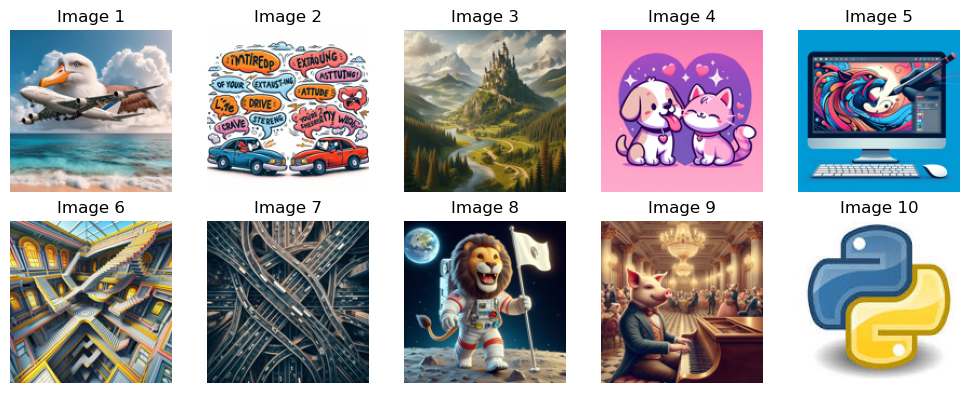

Choose an image: 4
You have chosen image: 4


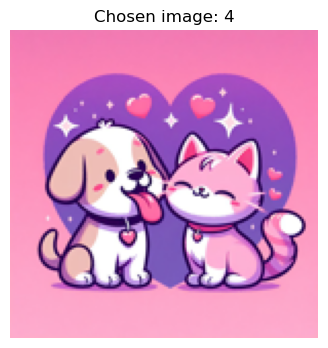

In [34]:
# Create list of 10 images
image1 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\ALbatros.jpg'))
image2 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Cars.jpg'))
image3 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Castle.jpg'))
image4 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Catdog.jpg'))
image5 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Coputer-image.jpg'))
image6 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Escher.jpg'))
image7 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Highway.jpg'))
image8 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\Lion.jpg'))
image9 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\piano_pig.jpg'))
image10 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\python.jpg'))

sample_images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10]
for i in sample_images:
    max_size = (150, 150)
    i.thumbnail(max_size)


# Display images

fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs.flat):
    if i < len(sample_images):
        ax.imshow(sample_images[i])
        ax.set_title(f"Image {i+1}")
        ax.axis('off')

plt.tight_layout()
plt.show()

# Ask input
chosen_image_number = int(input("Choose an image: "))

# Check input
if 1 <= chosen_image_number <= 10:
    chosen_image = sample_images[chosen_image_number - 1]
    print(f"You have chosen image: {chosen_image_number}")
    plt.figure(figsize=(5, 4))
    plt.imshow(chosen_image)
    plt.title(f"Chosen image: {chosen_image_number}")
    plt.axis('off')
else:
    print("Please enter a number between 1 and 10.")
    
#Convert chosen image to array
chosen_image_array = np.array(chosen_image)

### Opdracht Stap 4 : Opgelegde manipulaties

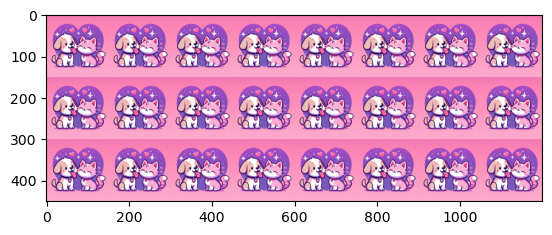

In [35]:
#3x8
chosen_image_k8r3 = repeat_k (repeat_r (chosen_image_array,3),8)
plt.imshow(chosen_image_k8r3)

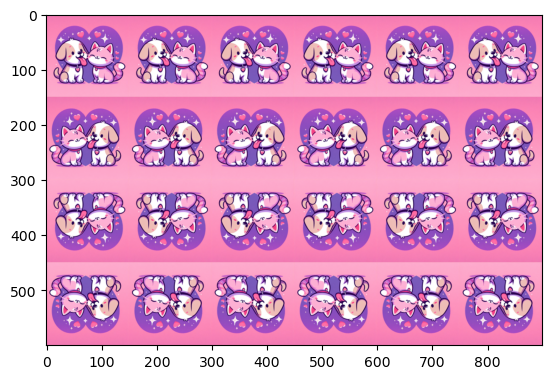

In [36]:
#4x6
chosen_image_k6r4 = repeat_k (np.concatenate([chosen_image_array, (fliphor (chosen_image_array)), (flipver (chosen_image_array)), (fliphorver (chosen_image_array))], axis = 0),6)
plt.imshow(chosen_image_k6r4)

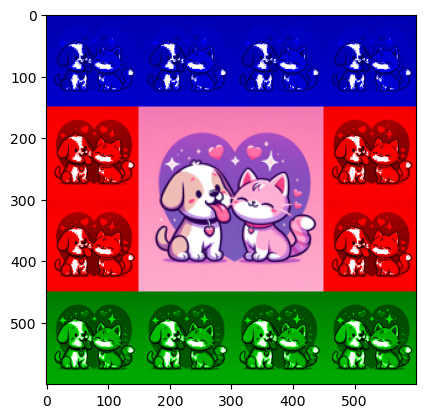

In [37]:
#4x4
chosen_image_array_redw = keepcolor_w (chosen_image_array,0)
chosen_image_array_greenw = keepcolor_w (chosen_image_array,1)
chosen_image_array_bluew = keepcolor_w (chosen_image_array,2)
pict2a = repeat_k (chosen_image_array_bluew, 4)
pict2c = repeat_k (chosen_image_array_greenw, 4)
pict2b = np.concatenate([repeat_r (chosen_image_array_redw, 2), larger (chosen_image_array, 2), repeat_r (chosen_image_array_redw, 2)], axis = 1)
pict2 = np.concatenate([pict2a, pict2b, pict2c], axis = 0)
plt.imshow(pict2)

### Opdracht Stap 5 : Generalize

**Grid with flips**

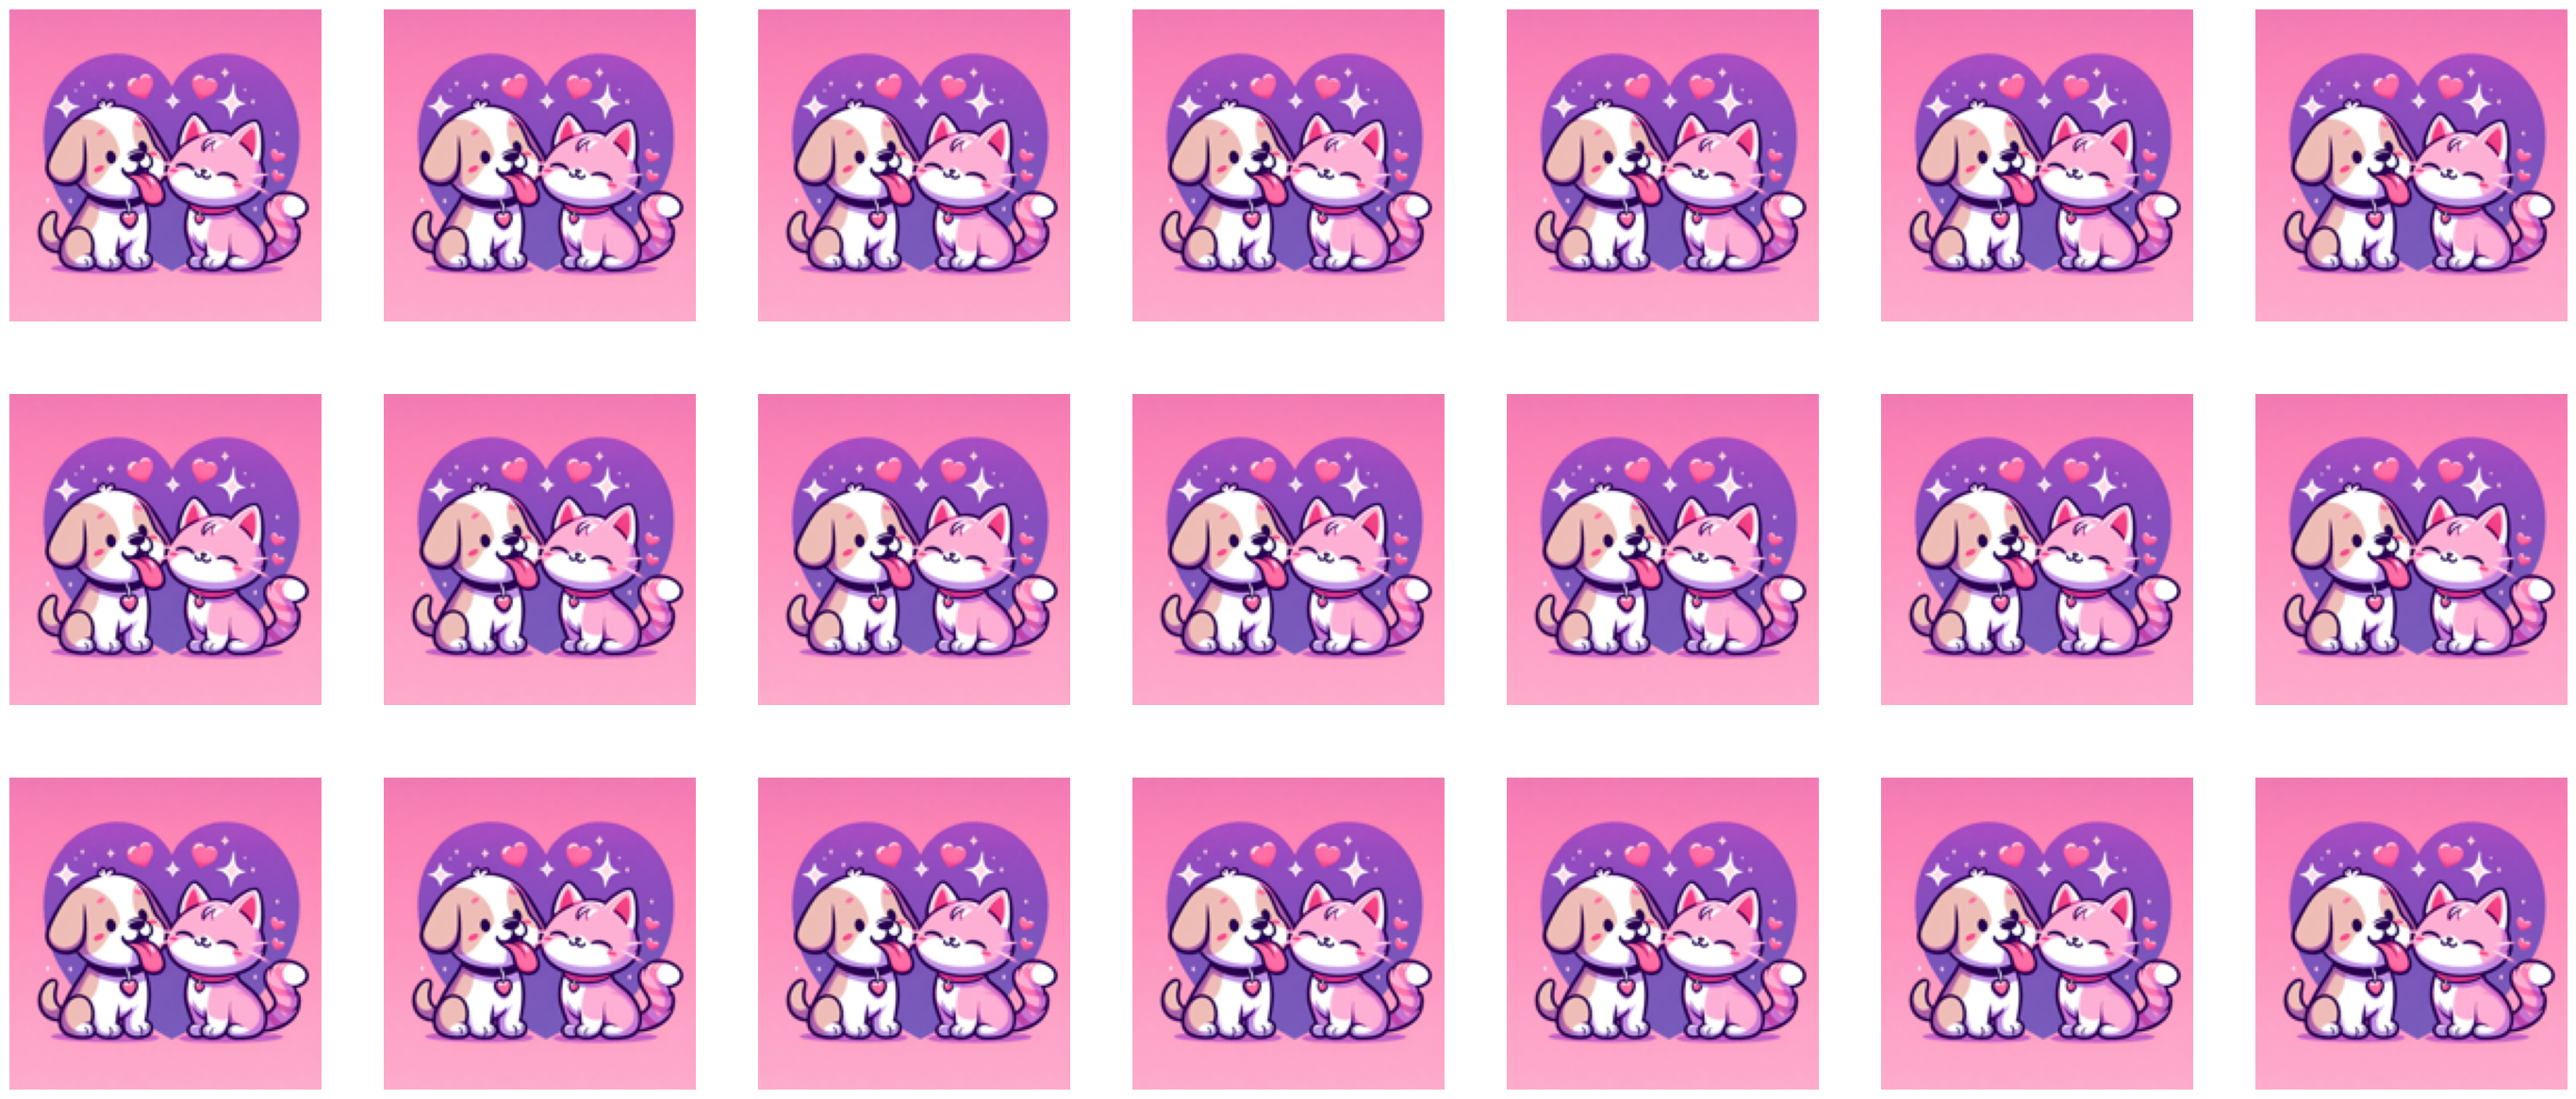

In [55]:
grid_with_flips(chosen_image, ([0 for i in range(7)] for j in range(3)))

**Big colourful one**

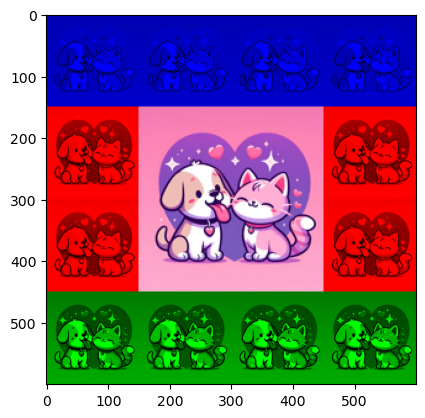

In [62]:
create_colorful_big_one(chosen_image,['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r','r'])

### Opdracht Stap 6 : Eigen manipulaties